<a href="https://colab.research.google.com/github/juan1t0/multimodalDLforER/blob/master/EmbraeNet_Plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EmbraceNet+: Multi-modal DL method for Emotion Recognition

https://github.com/juan1t0/multimodalDLforER

This notebook contains the execution (data preprocesing, training and testing) of the entire proposed method.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic dependences

## Code

Downloading the source code from the [public repository](https://github.com/juan1t0/scofmer.git).

In [2]:
scof_repo = 'https://github.com/juan1t0/multimodalDLforER.git'
!git clone $scof_repo

Cloning into 'multimodalDLforER'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 355 (delta 9), reused 6 (delta 6), pack-reused 344
Receiving objects: 100% (355/355), 2.28 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (212/212), done.


https://pytorch.org/

In [3]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.1/708.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 108.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.6.0+cu101 which is incompatible.
torchaudio 0.13.1+cu116 requires torch=


https://github.com/serengil/deepface

Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib and SFace.

Experiments show that human beings have 97.53% accuracy on facial recognition tasks whereas those models already reached and passed that accuracy level.


In [4]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=c301e216bd4f3fa22b84876fbe5ac876675fd26b5dbeb04ffc2b407f409c36a9
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


# Getting data

### Download

The emotic page provide the shared link to get the images and the simple download of annotations.

In [5]:
!ls

drive  multimodalDLforER  sample_data


In [6]:
!unzip '/content/drive/MyDrive/Emotic_MultiDB-test.zip' -d '/content/drive/MyDrive/'

Archive:  /content/drive/MyDrive/Emotic_MultiDB-test.zip
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000136.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000166.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000135.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000127.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000138.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000171.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000082.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000145.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000154.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000131.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000079.npy  
  inflating: /content/drive/MyDrive/Emotic_MultiDB/val/face/face_000172.npy  
  infla

There is an example of the data generated for each modality, the postural skeleton is not illustrated.

The . npy format is the standard binary file format in NumPy for persisting a single arbitrary NumPy array on disk. The format stores all of the shape and dtype information necessary to reconstruct the array correctly even on another machine with a different architecture.

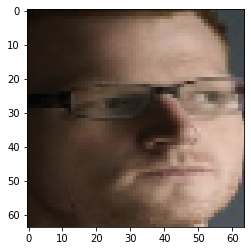

In [61]:
import numpy as np
import matplotlib.pyplot as plt

img = np.load('/content/drive/MyDrive/Emotic_MultiDB/train/face/face_000000.npy')
plt.imshow(img)

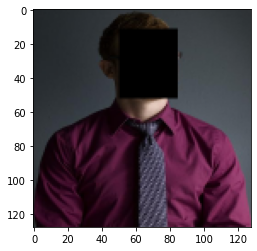

In [59]:
img = np.load('/content/drive/MyDrive/Emotic_MultiDB/train/person/body_000000.npy')
plt.imshow(img)

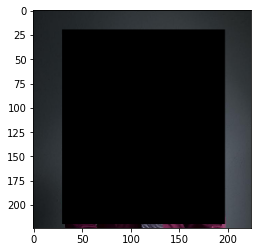

In [62]:
img = np.load('/content/drive/MyDrive/Emotic_MultiDB/train/context/cntx_000000.npy')
plt.imshow(img)

# Getting models

In [10]:
import torch
import torch.nn as nn
import numpy as np

In [11]:
device = torch.device('cuda') # 

In [12]:
# CREATING THE FOLDER TO SAVE THE ENTRY CONTROL POINTS OF THE MODELS
import os
checkpointsdir = 'Checkpoints'
if not os.path.exists(checkpointsdir):
  os.mkdir(checkpointsdir)

### ABN models for BODY & CONTEXT

In [13]:
from multimodalDLforER.models.context_net import resnet18, resnet50

In [14]:
Body_model = resnet18(pretrained=True, num_classes=8)
Body_model = Body_model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

missing fc.weight
missing fc.bias
100 modules loaded and 2 modules missing or no matching


In [15]:
Context_model = resnet18(pretrained=True, num_classes=8)
Context_model = Context_model.to(device)

missing fc.weight
missing fc.bias
100 modules loaded and 2 modules missing or no matching


### VGG model for FACE

In [16]:
from multimodalDLforER.models.face_net import ShortVGG as VGG
# from multimodalDLforER.models.face_net import getTorchVGG as torchVGG

In [17]:
Face_shortVGG = VGG('VGG19', numclasses=8, pretrain=True).to(device)
# Face_shortVGG = VGG('VGG19', numclasses=26, pretrain=True).to(device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

missing features.7.weight
missing features.10.weight
missing features.10.bias
missing features.14.weight
missing features.21.weight
missing features.21.bias
missing features.23.weight
missing features.23.bias
missing features.28.weight
missing features.34.weight
8 modules loaded and 10 modules missing


### Directed GCNN for Posture

In [18]:
from multimodalDLforER.models.skeleton_net import Model as DGCNN

In [19]:
Pose_model = DGCNN(num_class=8, num_point=15, num_person=1).to(device)

# Multi-modal

## Training & testing

### base configs

In [20]:
from multimodalDLforER.models.fusion_model import MergeClass

In [21]:
from multimodalDLforER.utils.dataset import Emotic_MultiDB, Rescale, RandomCrop, ToTensor
from torchvision import transforms, utils

from multimodalDLforER.utils.dataset import my_collate as collate

In [22]:
from multimodalDLforER.utils.traineval import train_step, eval

from torch.optim import Adam
from tqdm.notebook import tqdm

In [23]:
original_cats = ['Affection', 'Anger', 'Annoyance', 'Anticipation', 'Aversion',
                 'Confidence', 'Disapproval', 'Disconnection', 'Disquietment',
                 'Doubt/Confusion', 'Embarrassment', 'Engagement', 'Esteem',
                 'Excitement', 'Fatigue', 'Fear', 'Happiness', 'Pain', 'Peace',
                 'Pleasure', 'Sadness', 'Sensitivity', 'Suffering', 'Surprise',
                 'Sympathy', 'Yearning']

modal_dirs = ['context','face','person','posture-bones','posture-joints']

newlabeles = {'len':8,
              'cat':{'joy':['Excitement', 'Happiness', 'Peace', 'Affection', 'Pleasure',],
                     'trust':['Confidence', 'Esteem', 'Sympathy',],
                     'fear':['Disquietment','Embarrassment','Fear',],
                     'surprice':['Doubt/Confusion','Surprise',],
                     'sadness':['Pain', 'Sadness', 'Sensitivity', 'Suffering',],
                     'disgust':['Aversion','Disconnection', 'Fatigue','Yearning'],
                     'anger':['Anger', 'Annoyance', 'Disapproval',],
                     'anticipation':['Anticipation', 'Engagement',]}
                     }

In [24]:
from torch.utils.data.sampler import WeightedRandomSampler

def get_weighted_random_sampler(root_dir='/content/drive/MyDrive/Emotic_MultiDB', annotation_dir='Annotations', mode='train',
                                modality='label', takeone=True, modals_dirs=modal_dirs, categories=original_cats,
                                relabel=True, new_labeles=newlabeles):
  dataset = Emotic_MultiDB(root_dir, annotation_dir, mode, modality, takeone, modals_dirs, categories)
  if relabel:
    dataset.relabeled(newlabeles)
  
  target = []
  for i in range(len(dataset)):
    try:
      target += [np.argmax(dataset[i]['label'])]
    except:
      pass
  target = np.asarray(target)
  class_sample_count = np.unique(target, return_counts=True)[1]
  weight = 1. / class_sample_count
  samples_weight = weight[target]
  # print(weight)
  # print(class_sample_count)
  # print(samples_weight[0], samples_weight[-1])
  
  samples_weight = torch.from_numpy(samples_weight).double()
  # print(samples_weight.shape)
  sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
  return sampler

In [25]:
ALL_trainDB = Emotic_MultiDB(root_dir='/content/drive/MyDrive/Emotic_MultiDB',
                             annotation_dir='Annotations',
                             mode='train',
                             modality='all',
                             modals_dirs=modal_dirs,
                             categories=original_cats,
                             transform=transforms.Compose([Rescale(256,256,56),
                                                           RandomCrop(224,224,48),
                                                           ToTensor()
                                                           ])
                             )
ALL_trainDB.relabeled(newlabeles)
print('{} samples in all train db'.format(len(ALL_trainDB)))

194 samples in all train db


In [26]:
ALL_valDB = Emotic_MultiDB(root_dir='/content/drive/MyDrive/Emotic_MultiDB',
                             annotation_dir='Annotations',
                             mode='val',
                             modality='all',
                             modals_dirs=modal_dirs,
                             categories=original_cats,
                             transform=transforms.Compose([Rescale(256,256,56),
                                                           RandomCrop(224,224,48),
                                                           ToTensor()
                                                           ])
                             )
ALL_valDB.relabeled(newlabeles)
print('{} samples in all train db'.format(len(ALL_valDB)))

189 samples in all train db


In [27]:
ALL_testDB = Emotic_MultiDB(root_dir='/content/drive/MyDrive/Emotic_MultiDB',
                             annotation_dir='Annotations',
                             mode='test',
                             modality='all',
                             modals_dirs=modal_dirs,
                             categories=original_cats,
                             transform=transforms.Compose([Rescale(256,256,56),
                                                           RandomCrop(224,224,48),
                                                           ToTensor()
                                                           ])
                             )
ALL_testDB.relabeled(newlabeles)
print('{} samples in all train db'.format(len(ALL_testDB)))

486 samples in all train db


In [28]:
trainSampler = get_weighted_random_sampler()

In [29]:
valSampler = get_weighted_random_sampler(mode='val')

In [30]:
testSampler = get_weighted_random_sampler(mode='test')

In [31]:
uni_models = {'body':Body_model.eval(),
              'context':Context_model.eval(),
              'face':Face_shortVGG.eval(),
              'pose':Pose_model.eval()}

### EmbraceNet (intermediate data)

In [32]:
Merge_11_configures ={
	'type':	1,
	'parameters': {
		'num_classes': 8,
		'input_sizes': [512, 512, 512, 512, ],
		'embrace_size': 512,
		'docker_architecture': [[512], [512], [512], [512],],
		'finalouts': False,
		'device': torch.device('cuda'),
    'use_ll': True,
		'll_config': [256, 'D', 128, 'D', 'R', 8],
		'trainable_probs': False
		}
}

In [33]:
MergerModel = MergeClass(uni_models, Merge_11_configures, device)

In [34]:
all_loss = nn.BCEWithLogitsLoss()
all_opt = Adam(MergerModel.parameters(), lr=0.001, weight_decay=5e-4)

In [35]:
epoch_start = 0
last_epoch = 32
train_loss = [0] * (last_epoch-epoch_start)
val_loss = [0] * (last_epoch-epoch_start)
train_map = [0] * (last_epoch-epoch_start)
val_map = [0] * (last_epoch-epoch_start)
maxacc = -1
step_val = None
step_save = 5
batch_sz = 32

In [36]:
# The model is saved as "all_merge11" around 6 min

for ep in range(epoch_start, last_epoch):
  maxacc = train_step(Model=MergerModel, dataset_t=ALL_trainDB,
                      dataset_v=ALL_valDB, bsz=batch_sz,
                      Loss=all_loss, optimizer=all_opt,
                      collate=collate, epoch=ep,
                      tsampler=trainSampler, vsampler=valSampler,
                      last_epoch=last_epoch, modal='all',
                      device=device, debug_mode=True,
                      tqdm=tqdm, train_loss=train_loss,
                      train_map=train_map, val_loss=val_loss,
                      val_map=val_map, maxacc=maxacc,
                      step2val=step_val, step2save=step_save,
                      checkpointdir='Checkpoints', model_name='all_merge11')
  print('/////////////////////////////////////////////////////////////////')

  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09931211 0.17499079 0.09067116 0.15088978 0.21451229 0.18284921
 0.18643624 0.52379006] |8| mAP: 0.2029314637184143


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.11449437 0.20692343 0.35679787 0.56988347 0.5259069  0.5273493
 0.57883376 0.8019073 ] |8| mAP: 0.4602620601654053
- Mean training loss: 0.8926 ; epoch 1
- Mean validation loss: 1.0765 ; epoch 1
- Mean training mAP: 0.2029 ; epoch 1
- Mean validation mAP: 0.4603 ; epoch 1
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16530785 0.14116599 0.1791561  0.1475603  0.21022396 0.17717783
 0.14196937 0.4398999 ] |8| mAP: 0.2003076672554016


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.11848483 0.26593867 0.39554086 0.3885666  0.49723828 0.5881587
 0.41791227 0.9314979 ] |8| mAP: 0.45041728019714355
- Mean training loss: 0.7486 ; epoch 2
- Mean validation loss: 0.6972 ; epoch 2
- Mean training mAP: 0.2003 ; epoch 2
- Mean validation mAP: 0.4504 ; epoch 2
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15371174 0.14708078 0.13464817 0.12736036 0.19793841 0.17642075
 0.14921018 0.4999716 ] |8| mAP: 0.19829276204109192


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.16970831 0.27489528 0.32378316 0.5270907  0.5673135  0.45915785
 0.48457143 0.88461107] |8| mAP: 0.4613913893699646
- Mean training loss: 0.6329 ; epoch 3
- Mean validation loss: 0.7519 ; epoch 3
- Mean training mAP: 0.1983 ; epoch 3
- Mean validation mAP: 0.4614 ; epoch 3
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09892733 0.19675763 0.1171154  0.11545537 0.24549197 0.16878879
 0.16170695 0.48175442] |8| mAP: 0.1982497274875641


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21803668 0.3318895  0.29423976 0.39764318 0.4591726  0.5367229
 0.5862332  0.85972834] |8| mAP: 0.46045824885368347
- Mean training loss: 0.6411 ; epoch 4
- Mean validation loss: 0.7133 ; epoch 4
- Mean training mAP: 0.1982 ; epoch 4
- Mean validation mAP: 0.4605 ; epoch 4
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12759888 0.25115794 0.16726989 0.18285522 0.28697342 0.19775829
 0.13884054 0.46006984] |8| mAP: 0.22656551003456116


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.177002   0.2586175  0.21825202 0.37450662 0.5202941  0.6123422
 0.4248981  0.8706617 ] |8| mAP: 0.4320717453956604
- Mean training loss: 0.5370 ; epoch 5
- Mean validation loss: 0.7290 ; epoch 5
- Mean training mAP: 0.2266 ; epoch 5
- Mean validation mAP: 0.4321 ; epoch 5
Model Checkpoints/all_merge11_best.pth saved
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15096939 0.17195964 0.1752387  0.21105148 0.26596755 0.18472843
 0.19437121 0.587003  ] |8| mAP: 0.24266117811203003


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.10131945 0.21082501 0.4071476  0.42742172 0.6385855  0.57385945
 0.50068545 0.841204  ] |8| mAP: 0.4626310169696808
- Mean training loss: 0.5519 ; epoch 6
- Mean validation loss: 0.7377 ; epoch 6
- Mean training mAP: 0.2427 ; epoch 6
- Mean validation mAP: 0.4626 ; epoch 6
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14167513 0.27767837 0.20846228 0.15469928 0.2505606  0.2776694
 0.1863865  0.3514891 ] |8| mAP: 0.23107758164405823


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.22628479 0.24651505 0.27530128 0.31102312 0.4919567  0.60247207
 0.4077848  0.86192024] |8| mAP: 0.427907258272171
- Mean training loss: 0.6256 ; epoch 7
- Mean validation loss: 0.6911 ; epoch 7
- Mean training mAP: 0.2311 ; epoch 7
- Mean validation mAP: 0.4279 ; epoch 7
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14201373 0.11989956 0.14165157 0.20393343 0.1899936  0.1408411
 0.2525767  0.5133918 ] |8| mAP: 0.21303768455982208


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.12648392 0.28576455 0.304577   0.30125704 0.56849897 0.5950453
 0.38644013 0.9127904 ] |8| mAP: 0.43510717153549194
- Mean training loss: 0.5661 ; epoch 8
- Mean validation loss: 0.6995 ; epoch 8
- Mean training mAP: 0.2130 ; epoch 8
- Mean validation mAP: 0.4351 ; epoch 8
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14625601 0.17865154 0.13882285 0.22239706 0.37777987 0.23571785
 0.2346521  0.5403968 ] |8| mAP: 0.2593342661857605


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.18821472 0.30488947 0.26226556 0.42345536 0.525935   0.53223455
 0.37251833 0.89440054] |8| mAP: 0.437989205121994
- Mean training loss: 0.5431 ; epoch 9
- Mean validation loss: 0.7164 ; epoch 9
- Mean training mAP: 0.2593 ; epoch 9
- Mean validation mAP: 0.4380 ; epoch 9
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16339625 0.18279205 0.10822927 0.13417901 0.21165627 0.16524743
 0.2347533  0.44915396] |8| mAP: 0.20617595314979553


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.18161929 0.31055522 0.35517186 0.4999428  0.58615506 0.56928426
 0.37629208 0.89082   ] |8| mAP: 0.47123008966445923
- Mean training loss: 0.4768 ; epoch 10
- Mean validation loss: 0.7863 ; epoch 10
- Mean training mAP: 0.2062 ; epoch 10
- Mean validation mAP: 0.4712 ; epoch 10
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15163794 0.18510035 0.18077756 0.15902421 0.2837174  0.13411562
 0.2238905  0.46145588] |8| mAP: 0.22246494889259338


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13587937 0.27052304 0.23809618 0.29033047 0.5364797  0.55487925
 0.3040718  0.93081534] |8| mAP: 0.4076343774795532
- Mean training loss: 0.4913 ; epoch 11
- Mean validation loss: 0.7452 ; epoch 11
- Mean training mAP: 0.2225 ; epoch 11
- Mean validation mAP: 0.4076 ; epoch 11
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10375282 0.11327842 0.1955634  0.24329837 0.3231174  0.29129782
 0.17971107 0.4374014 ] |8| mAP: 0.23592761158943176


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21365047 0.32726753 0.22518997 0.34785357 0.48341662 0.60326815
 0.32836527 0.91892266] |8| mAP: 0.4309917688369751
- Mean training loss: 0.5135 ; epoch 12
- Mean validation loss: 0.7281 ; epoch 12
- Mean training mAP: 0.2359 ; epoch 12
- Mean validation mAP: 0.4310 ; epoch 12
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.17878827 0.22820196 0.07219467 0.1377834  0.3567116  0.21822965
 0.16195337 0.7333229 ] |8| mAP: 0.260898232460022


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1618842  0.38338652 0.2905302  0.299103   0.47349617 0.58974445
 0.2660736  0.9593488 ] |8| mAP: 0.4279458522796631
- Mean training loss: 0.5081 ; epoch 13
- Mean validation loss: 0.6840 ; epoch 13
- Mean training mAP: 0.2609 ; epoch 13
- Mean validation mAP: 0.4279 ; epoch 13
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13604532 0.1623277  0.16774711 0.1194801  0.3716433  0.2521673
 0.20581365 0.4881887 ] |8| mAP: 0.2379266619682312


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13767178 0.31134844 0.33189553 0.31145078 0.5558411  0.5349234
 0.3366471  0.955815  ] |8| mAP: 0.43444913625717163
- Mean training loss: 0.5062 ; epoch 14
- Mean validation loss: 0.7028 ; epoch 14
- Mean training mAP: 0.2379 ; epoch 14
- Mean validation mAP: 0.4344 ; epoch 14
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.17432497 0.17048238 0.12059514 0.11565513 0.361063   0.19517419
 0.17946464 0.55620563] |8| mAP: 0.23412065207958221


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21730822 0.40724427 0.42541373 0.32271037 0.61136186 0.60389274
 0.28585926 0.9611073 ] |8| mAP: 0.47936221957206726
- Mean training loss: 0.5359 ; epoch 15
- Mean validation loss: 0.7196 ; epoch 15
- Mean training mAP: 0.2341 ; epoch 15
- Mean validation mAP: 0.4794 ; epoch 15
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10277245 0.18872042 0.13672432 0.14012331 0.333012   0.27000123
 0.182567   0.57415295] |8| mAP: 0.24100922048091888


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1437743  0.31483722 0.37755573 0.3242587  0.5070688  0.6301437
 0.33208796 0.9667311 ] |8| mAP: 0.44955718517303467
- Mean training loss: 0.4782 ; epoch 16
- Mean validation loss: 0.7284 ; epoch 16
- Mean training mAP: 0.2410 ; epoch 16
- Mean validation mAP: 0.4496 ; epoch 16
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.08670392 0.13296147 0.24185683 0.23233026 0.24802177 0.2086949
 0.1321822  0.46920735] |8| mAP: 0.21899482607841492


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23117326 0.4463394  0.44107017 0.2729563  0.6012364  0.55315095
 0.24486262 0.9488996 ] |8| mAP: 0.46746110916137695
- Mean training loss: 0.5154 ; epoch 17
- Mean validation loss: 0.7122 ; epoch 17
- Mean training mAP: 0.2190 ; epoch 17
- Mean validation mAP: 0.4675 ; epoch 17
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13478902 0.12406884 0.24038891 0.18092914 0.58147025 0.22019069
 0.26877996 0.45517084] |8| mAP: 0.2757234573364258


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.24403718 0.34116757 0.2935462  0.29584643 0.55280656 0.5850761
 0.2747021  0.9276275 ] |8| mAP: 0.4393512010574341
- Mean training loss: 0.4631 ; epoch 18
- Mean validation loss: 0.7262 ; epoch 18
- Mean training mAP: 0.2757 ; epoch 18
- Mean validation mAP: 0.4394 ; epoch 18
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.11305787 0.17072754 0.11757902 0.18221678 0.34320208 0.25574303
 0.28889954 0.5112834 ] |8| mAP: 0.24783866107463837


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1780274  0.31512684 0.33717772 0.36674225 0.6178497  0.58997256
 0.25584233 0.96286976] |8| mAP: 0.4529510736465454
- Mean training loss: 0.4701 ; epoch 19
- Mean validation loss: 0.7935 ; epoch 19
- Mean training mAP: 0.2478 ; epoch 19
- Mean validation mAP: 0.4530 ; epoch 19
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15234305 0.23208192 0.15068088 0.14518829 0.40393937 0.19260672
 0.2238293  0.5346801 ] |8| mAP: 0.2544187009334564


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23983178 0.40859967 0.36191276 0.35954162 0.52608997 0.5771625
 0.24752097 0.9617537 ] |8| mAP: 0.46030163764953613
- Mean training loss: 0.5362 ; epoch 20
- Mean validation loss: 0.7260 ; epoch 20
- Mean training mAP: 0.2544 ; epoch 20
- Mean validation mAP: 0.4603 ; epoch 20
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.06239937 0.18418483 0.11221295 0.1148664  0.48840624 0.21754068
 0.24919932 0.515387  ] |8| mAP: 0.24302460253238678


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13914709 0.2627697  0.34709814 0.33059546 0.5872391  0.67901075
 0.3259438  0.9193649 ] |8| mAP: 0.4488961100578308
- Mean training loss: 0.4552 ; epoch 21
- Mean validation loss: 0.7478 ; epoch 21
- Mean training mAP: 0.2430 ; epoch 21
- Mean validation mAP: 0.4489 ; epoch 21
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16399331 0.22619852 0.07199226 0.17403464 0.42506865 0.2040137
 0.2613279  0.53825116] |8| mAP: 0.25811001658439636


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20136738 0.35500216 0.2187217  0.26858804 0.50218475 0.64332265
 0.22117664 0.9590643 ] |8| mAP: 0.4211784601211548
- Mean training loss: 0.5229 ; epoch 22
- Mean validation loss: 0.7901 ; epoch 22
- Mean training mAP: 0.2581 ; epoch 22
- Mean validation mAP: 0.4212 ; epoch 22
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1912039  0.18835284 0.17148799 0.2628274  0.32272124 0.15938774
 0.45114106 0.54300165] |8| mAP: 0.28626549243927


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1502001  0.31217796 0.27459073 0.37473187 0.5824986  0.6062539
 0.25002095 0.9317373 ] |8| mAP: 0.43527644872665405
- Mean training loss: 0.4754 ; epoch 23
- Mean validation loss: 0.7394 ; epoch 23
- Mean training mAP: 0.2863 ; epoch 23
- Mean validation mAP: 0.4353 ; epoch 23
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.08143264 0.15312175 0.13385586 0.24272907 0.42633706 0.23614323
 0.55321604 0.4086829 ] |8| mAP: 0.2794398069381714


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.16679527 0.3597231  0.28445408 0.32693216 0.47619158 0.6748275
 0.23294577 0.927634  ] |8| mAP: 0.4311879277229309
- Mean training loss: 0.4727 ; epoch 24
- Mean validation loss: 0.7782 ; epoch 24
- Mean training mAP: 0.2794 ; epoch 24
- Mean validation mAP: 0.4312 ; epoch 24
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1534631  0.23098765 0.12872563 0.10460466 0.32300416 0.21942972
 0.35855204 0.5013134 ] |8| mAP: 0.25251004099845886


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.26198375 0.4416892  0.31940284 0.34106675 0.52799565 0.6100545
 0.26241118 0.9312646 ] |8| mAP: 0.4619835615158081
- Mean training loss: 0.4532 ; epoch 25
- Mean validation loss: 0.7903 ; epoch 25
- Mean training mAP: 0.2525 ; epoch 25
- Mean validation mAP: 0.4620 ; epoch 25
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.17161283 0.15757288 0.19552824 0.18543753 0.38784257 0.23352362
 0.37295622 0.55821085] |8| mAP: 0.28283560276031494


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.26856184 0.37738243 0.297683   0.24476708 0.53606004 0.61729765
 0.21730037 0.957475  ] |8| mAP: 0.4395659267902374
- Mean training loss: 0.5152 ; epoch 26
- Mean validation loss: 0.7573 ; epoch 26
- Mean training mAP: 0.2828 ; epoch 26
- Mean validation mAP: 0.4396 ; epoch 26
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16518763 0.20021503 0.14779073 0.24283358 0.44013086 0.28383374
 0.39480639 0.51139826] |8| mAP: 0.29827451705932617


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.28641015 0.40815887 0.35076267 0.27394447 0.53027403 0.67233217
 0.26725528 0.96308416] |8| mAP: 0.46902772784233093
- Mean training loss: 0.4528 ; epoch 27
- Mean validation loss: 0.7476 ; epoch 27
- Mean training mAP: 0.2983 ; epoch 27
- Mean validation mAP: 0.4690 ; epoch 27
Model Checkpoints/all_merge11_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1124709  0.14752151 0.15338878 0.2964277  0.379621   0.30242947
 0.3648504  0.48944443] |8| mAP: 0.2807692587375641


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.104744   0.339187   0.36818022 0.2883888  0.4941555  0.75321174
 0.30150363 0.9353092 ] |8| mAP: 0.4480850100517273
- Mean training loss: 0.4942 ; epoch 28
- Mean validation loss: 0.7568 ; epoch 28
- Mean training mAP: 0.2808 ; epoch 28
- Mean validation mAP: 0.4481 ; epoch 28
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16492882 0.15560985 0.14849032 0.2218048  0.39257634 0.31215805
 0.4535084  0.48496646] |8| mAP: 0.2917553782463074


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13610478 0.22397687 0.3556667  0.24684788 0.5819806  0.6761417
 0.33735558 0.90922356] |8| mAP: 0.43341219425201416
- Mean training loss: 0.4496 ; epoch 29
- Mean validation loss: 0.7354 ; epoch 29
- Mean training mAP: 0.2918 ; epoch 29
- Mean validation mAP: 0.4334 ; epoch 29
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1654052  0.23490325 0.12746696 0.31066427 0.5329641  0.2717498
 0.34814298 0.5208334 ] |8| mAP: 0.3140162527561188


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23852552 0.35761857 0.31516546 0.24844484 0.56119967 0.63415855
 0.26473796 0.9410975 ] |8| mAP: 0.4451184868812561
- Mean training loss: 0.4367 ; epoch 30
- Mean validation loss: 0.7863 ; epoch 30
- Mean training mAP: 0.3140 ; epoch 30
- Mean validation mAP: 0.4451 ; epoch 30
Model Checkpoints/all_merge11_best.pth saved
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15933663 0.09188356 0.19045494 0.22405052 0.5789828  0.229008
 0.4070996  0.46018928] |8| mAP: 0.29262566566467285


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.2335415  0.39645353 0.2369664  0.21133497 0.595997   0.72761273
 0.19639038 0.97076964] |8| mAP: 0.4461332857608795
- Mean training loss: 0.4171 ; epoch 31
- Mean validation loss: 0.7687 ; epoch 31
- Mean training mAP: 0.2926 ; epoch 31
- Mean validation mAP: 0.4461 ; epoch 31
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.20046979 0.2471704  0.14230478 0.22864814 0.47349966 0.2231351
 0.5155654  0.584179  ] |8| mAP: 0.32687151432037354


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.14072077 0.2704696  0.3951451  0.25678787 0.6258238  0.64491415
 0.2955888  0.9354292 ] |8| mAP: 0.4456099271774292
- Mean training loss: 0.4789 ; epoch 32
- Mean validation loss: 0.7881 ; epoch 32
- Mean training mAP: 0.3269 ; epoch 32
- Mean validation mAP: 0.4456 ; epoch 32
Model Checkpoints/all_merge11_best.pth saved
Model Checkpoints/all_merge11_last.pth saved
/////////////////////////////////////////////////////////////////


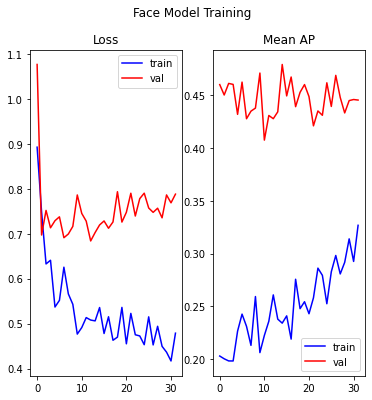

In [37]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 6))
f.suptitle('Face Model Training')
ax1.plot(range(0,len(train_loss)), train_loss, color='Blue')
ax1.plot(range(0,len(val_loss)), val_loss, color='Red')
ax2.plot(range(0,len(train_map)), train_map, color='Blue')
ax2.plot(range(0,len(val_map)), val_map, color='Red')
ax1.legend(['train','val'])
ax2.legend(['train','val'])
ax1.title.set_text('Loss')
ax2.title.set_text('Mean AP')

Test with models of epoch 32




In [38]:
allMAP = eval(MergerModel, ALL_testDB, 32, testSampler, collate=collate, modal='all',
               device=device, debug_mode=True, tqdm=tqdm)

allMAP = eval(MergerModel, ALL_testDB, 32, None, collate=collate, modal='all',
               device=device, debug_mode=True, tqdm=tqdm)

  0%|          | 0/16 [00:00<?, ?batch/s]

AveragePrecision: [0.08568965 0.22037277 0.20006469 0.34812757 0.1761554  0.36958665
 0.21135254 0.8499305 ] |8| mAP: 0.30765998363494873


  0%|          | 0/16 [00:00<?, ?batch/s]

AveragePrecision: [0.7594821  0.6079854  0.16175361 0.2023503  0.10126271 0.25015852
 0.07122526 0.8422217 ] |8| mAP: 0.37455493211746216


### EmbraceNet (final outputs)

In [39]:
Merge_13_configures ={
	'type':	1,
	'parameters': {
		'num_classes': 8,
		'input_sizes': [8, 8, 8, 8, ],
		'embrace_size': 16,
		'docker_architecture': [[16], [16], [16], [16],],
		'finalouts': True,
		'device': torch.device('cuda'),
    'use_ll': True,
		'll_config': [32,'D','R', 8],
		'trainable_probs': False
		}
}

In [40]:
MergerModel = MergeClass(uni_models, Merge_13_configures, device)

In [41]:
all_loss = nn.BCEWithLogitsLoss()
all_opt = Adam(MergerModel.parameters(), lr=0.001, weight_decay=5e-4)

In [42]:
epoch_start = 0
last_epoch = 16
train_loss = [0] * (last_epoch-epoch_start)
val_loss = [0] * (last_epoch-epoch_start)
train_map = [0] * (last_epoch-epoch_start)
val_map = [0] * (last_epoch-epoch_start)
maxacc = -1
step_val = None
step_save = 4
batch_sz = 32

In [43]:
# the model is saved as "all_merge13"
for ep in range(epoch_start, last_epoch):
  maxacc = train_step(Model=MergerModel, dataset_t=ALL_trainDB,
                      dataset_v=ALL_valDB, bsz=batch_sz,
                      Loss=all_loss, optimizer=all_opt,
                      collate=collate, epoch=ep,
                      tsampler=trainSampler, vsampler=valSampler,
                      last_epoch=last_epoch, modal='all',
                      device=device, debug_mode=True,
                      tqdm=tqdm, train_loss=train_loss,
                      train_map=train_map, val_loss=val_loss,
                      val_map=val_map, maxacc=maxacc,
                      step2val=step_val, step2save=step_save,
                      checkpointdir='Checkpoints', model_name='all_merge13')
  print('/////////////////////////////////////////////////////////////////')

  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.2481157  0.13120663 0.19190189 0.20815356 0.23245552 0.23195295
 0.16954711 0.45395246] |8| mAP: 0.23341073095798492


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.15208639 0.44970462 0.3469994  0.4546814  0.50927234 0.60461414
 0.40094265 0.8506365 ] |8| mAP: 0.47111719846725464
- Mean training loss: 1.1814 ; epoch 1
- Mean validation loss: 0.8844 ; epoch 1
- Mean training mAP: 0.2334 ; epoch 1
- Mean validation mAP: 0.4711 ; epoch 1
Model Checkpoints/all_merge13_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.18200997 0.18373273 0.14249922 0.14394973 0.10900306 0.13120352
 0.24314722 0.4420116 ] |8| mAP: 0.1971946358680725


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21347609 0.36780983 0.21385412 0.44434112 0.49951082 0.6467756
 0.40985414 0.78858966] |8| mAP: 0.4480264484882355
- Mean training loss: 0.9817 ; epoch 2
- Mean validation loss: 0.8286 ; epoch 2
- Mean training mAP: 0.1972 ; epoch 2
- Mean validation mAP: 0.4480 ; epoch 2
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14847174 0.17545116 0.11414243 0.13677034 0.17718062 0.20565447
 0.17906094 0.46880254] |8| mAP: 0.20069177448749542


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21240109 0.39109105 0.3624521  0.43961677 0.44629562 0.5180279
 0.36223555 0.8491371 ] |8| mAP: 0.44765713810920715
- Mean training loss: 0.9316 ; epoch 3
- Mean validation loss: 0.7961 ; epoch 3
- Mean training mAP: 0.2007 ; epoch 3
- Mean validation mAP: 0.4477 ; epoch 3
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10421339 0.18097933 0.1202824  0.1970089  0.2175021  0.17053251
 0.25018668 0.50979006] |8| mAP: 0.21881191432476044


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.15405925 0.26358223 0.31140533 0.3391236  0.46383777 0.6848066
 0.28117186 0.8749231 ] |8| mAP: 0.4216137230396271
- Mean training loss: 0.8087 ; epoch 4
- Mean validation loss: 0.7702 ; epoch 4
- Mean training mAP: 0.2188 ; epoch 4
- Mean validation mAP: 0.4216 ; epoch 4
Model Checkpoints/all_merge13_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13703968 0.16873778 0.11994738 0.11795389 0.14004195 0.19657908
 0.2003981  0.45195866] |8| mAP: 0.1915820688009262


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.29871476 0.27601075 0.2857982  0.44704664 0.5598455  0.6422897
 0.31921896 0.8339486 ] |8| mAP: 0.4578591585159302
- Mean training loss: 0.8721 ; epoch 5
- Mean validation loss: 0.7457 ; epoch 5
- Mean training mAP: 0.1916 ; epoch 5
- Mean validation mAP: 0.4579 ; epoch 5
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12088218 0.13328494 0.13774681 0.13227847 0.23952422 0.14317888
 0.19244668 0.52858293] |8| mAP: 0.20349064469337463


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1769991  0.31466958 0.45474696 0.39000377 0.54757667 0.6586769
 0.4108826  0.84412736] |8| mAP: 0.4747103452682495
- Mean training loss: 0.7934 ; epoch 6
- Mean validation loss: 0.7515 ; epoch 6
- Mean training mAP: 0.2035 ; epoch 6
- Mean validation mAP: 0.4747 ; epoch 6
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1078876  0.190227   0.15145506 0.12194836 0.17453702 0.18061565
 0.17036015 0.52192485] |8| mAP: 0.20236945152282715


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20087835 0.29821655 0.27925113 0.32243374 0.48460168 0.6505936
 0.2773749  0.8060779 ] |8| mAP: 0.41492846608161926
- Mean training loss: 0.7066 ; epoch 7
- Mean validation loss: 0.7258 ; epoch 7
- Mean training mAP: 0.2024 ; epoch 7
- Mean validation mAP: 0.4149 ; epoch 7
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16689372 0.25212166 0.14318688 0.15685615 0.13167551 0.18616815
 0.2146459  0.51496756] |8| mAP: 0.22081445157527924


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.14485475 0.35667676 0.2552129  0.3362374  0.4848848  0.5765648
 0.3553248  0.8180664 ] |8| mAP: 0.4159778356552124
- Mean training loss: 0.6685 ; epoch 8
- Mean validation loss: 0.7036 ; epoch 8
- Mean training mAP: 0.2208 ; epoch 8
- Mean validation mAP: 0.4160 ; epoch 8
Model Checkpoints/all_merge13_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1669575  0.18226522 0.17393647 0.1113581  0.14770487 0.16012038
 0.23685348 0.48826364] |8| mAP: 0.20843245089054108


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.29630843 0.33680877 0.32174224 0.36488125 0.47732833 0.6023713
 0.35165554 0.8405876 ] |8| mAP: 0.44896042346954346
- Mean training loss: 0.6746 ; epoch 9
- Mean validation loss: 0.7205 ; epoch 9
- Mean training mAP: 0.2084 ; epoch 9
- Mean validation mAP: 0.4490 ; epoch 9
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.18747313 0.11254702 0.12736969 0.1860965  0.19932902 0.220604
 0.10927709 0.49724433] |8| mAP: 0.20499259233474731


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23252492 0.41860247 0.424289   0.37074444 0.397728   0.70559764
 0.2932304  0.89129263] |8| mAP: 0.46675118803977966
- Mean training loss: 0.6276 ; epoch 10
- Mean validation loss: 0.7356 ; epoch 10
- Mean training mAP: 0.2050 ; epoch 10
- Mean validation mAP: 0.4668 ; epoch 10
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12770483 0.27662873 0.14933102 0.16702649 0.15210484 0.14274637
 0.08593591 0.48164952] |8| mAP: 0.197890967130661


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.17055392 0.30302688 0.32832426 0.2869572  0.41622716 0.74991894
 0.2690454  0.9186506 ] |8| mAP: 0.4303380250930786
- Mean training loss: 0.6421 ; epoch 11
- Mean validation loss: 0.7132 ; epoch 11
- Mean training mAP: 0.1979 ; epoch 11
- Mean validation mAP: 0.4303 ; epoch 11
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09934659 0.18439814 0.14271846 0.12156383 0.18033291 0.1601712
 0.26002622 0.52630776] |8| mAP: 0.20935814082622528


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23915847 0.33051565 0.27968228 0.2941838  0.36025727 0.69676805
 0.30007052 0.8220943 ] |8| mAP: 0.4153412878513336
- Mean training loss: 0.6324 ; epoch 12
- Mean validation loss: 0.6961 ; epoch 12
- Mean training mAP: 0.2094 ; epoch 12
- Mean validation mAP: 0.4153 ; epoch 12
Model Checkpoints/all_merge13_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16536939 0.2691755  0.22172312 0.22308625 0.15628177 0.18794216
 0.24194385 0.5395133 ] |8| mAP: 0.2506294250488281


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.27129304 0.32809308 0.23094708 0.31566268 0.40333164 0.6733186
 0.32542238 0.80537105] |8| mAP: 0.4191799461841583
- Mean training loss: 0.5906 ; epoch 13
- Mean validation loss: 0.7228 ; epoch 13
- Mean training mAP: 0.2506 ; epoch 13
- Mean validation mAP: 0.4192 ; epoch 13
Model Checkpoints/all_merge13_best.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1688571  0.11034627 0.07469414 0.14103784 0.19504856 0.14538391
 0.2295363  0.5769248 ] |8| mAP: 0.20522859692573547


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.26143542 0.34980974 0.3497573  0.33888367 0.37826282 0.59634453
 0.30866224 0.7950323 ] |8| mAP: 0.42227351665496826
- Mean training loss: 0.5989 ; epoch 14
- Mean validation loss: 0.7787 ; epoch 14
- Mean training mAP: 0.2052 ; epoch 14
- Mean validation mAP: 0.4223 ; epoch 14
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12247175 0.244951   0.13234802 0.17122851 0.22310972 0.2027577
 0.11550158 0.49682972] |8| mAP: 0.21364974975585938


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.19637048 0.3279385  0.30021772 0.42471555 0.42679974 0.664431
 0.34299082 0.78767115] |8| mAP: 0.4338918924331665
- Mean training loss: 0.5730 ; epoch 15
- Mean validation loss: 0.7438 ; epoch 15
- Mean training mAP: 0.2136 ; epoch 15
- Mean validation mAP: 0.4339 ; epoch 15
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10150972 0.14273319 0.0893406  0.17801566 0.15096308 0.15558785
 0.16472806 0.45317358] |8| mAP: 0.17950646579265594


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.29918087 0.33540395 0.34611472 0.44652197 0.46932033 0.5347066
 0.40869278 0.8407735 ] |8| mAP: 0.4600893557071686
- Mean training loss: 0.5992 ; epoch 16
- Mean validation loss: 0.7649 ; epoch 16
- Mean training mAP: 0.1795 ; epoch 16
- Mean validation mAP: 0.4601 ; epoch 16
Model Checkpoints/all_merge13_last.pth saved
/////////////////////////////////////////////////////////////////


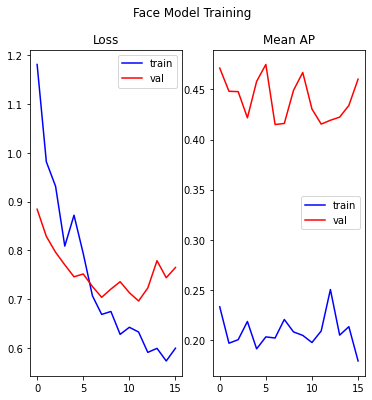

In [44]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 6))
f.suptitle('Face Model Training')
ax1.plot(range(0,len(train_loss)), train_loss, color='Blue')
ax1.plot(range(0,len(val_loss)), val_loss, color='Red')
ax2.plot(range(0,len(train_map)), train_map, color='Blue')
ax2.plot(range(0,len(val_map)), val_map, color='Red')
ax1.legend(['train','val'])
ax2.legend(['train','val'])
ax1.title.set_text('Loss')
ax2.title.set_text('Mean AP')

Test with model of epoch 16


In [45]:
allMAP = eval(MergerModel, ALL_testDB, 32, testSampler, collate=collate, modal='all',
               device=device, debug_mode=True, tqdm=tqdm)

allMAP = eval(MergerModel, ALL_testDB, 32, None, collate=collate, modal='all',
               device=device, debug_mode=True, tqdm=tqdm)

  0%|          | 0/16 [00:00<?, ?batch/s]

AveragePrecision: [0.16835786 0.2441231  0.18404803 0.3000528  0.232129   0.33372653
 0.26428992 0.7292919 ] |8| mAP: 0.30700236558914185


  0%|          | 0/16 [00:00<?, ?batch/s]

AveragePrecision: [0.7037963  0.58967185 0.17518072 0.23799795 0.10573285 0.30042747
 0.08266742 0.85918695] |8| mAP: 0.38183271884918213


### EmbraceNet+

In [46]:
Merge_5_configures = {
	'type':	5,
	'parameters': {
		'num_classes': 8,
		'input_sizes': 4,
		'final_input_sizes': 4,
		'embrace1_param': {
			'input_size_list': [512, 512, 512, 512, ],
			'embracement_size': 512,
			'docker_arch': [[1024, 'D', 512], [1024, 'D', 512], [1024, 'D', 512], [1024, 'D', 512],],
			'device': torch.device('cuda'),
		},
		'embrace2_param': {
			'input_size_list': [8, 8, 8, 8, ],
			'embracement_size': 32,
			'docker_arch': [[64, 'D', 32], [64, 'D', 32], [64, 'D', 32], [64, 'D', 32],],
			'device': torch.device('cuda'),
		},
		'embrace3_param': {
			'input_size_list': [128, 32, 8, 32,],
			'embracement_size': 64,
			'docker_arch': [[64], [64], [64], [64],],
			'device': torch.device('cuda'),
		},
		'wsum_confg': {
      'number_modals': 4,
			'outchannels': 1,
			'probabilities': None,
			'trainable': False,
			'mode': 'tensor', # 'convs', #
			'device': torch.device('cuda'),
    },
		'device': torch.device('cuda'),
		'trainable_probs': False,
		'useffinal': True,
		'use_ws': True,
		'use_ll': [True, False, True],
		'll_configs': [
			{'config': [128] ,
			'embrace_size': 512,},
			{},
			{'config': [8] ,
			'embrace_size': 64,}
		]}
}

In [47]:
MergerModel = MergeClass(uni_models, Merge_5_configures, device)

In [48]:
all_loss = nn.BCEWithLogitsLoss()
all_opt = Adam(MergerModel.parameters(), lr=0.001, weight_decay=5e-4)

In [49]:
epoch_start = 0
last_epoch = 24
train_loss = [0] * (last_epoch-epoch_start)
val_loss = [0] * (last_epoch-epoch_start)
train_map = [0] * (last_epoch-epoch_start)
val_map = [0] * (last_epoch-epoch_start)
maxacc = -1
step_val = None
step_save = 1
batch_sz = 32

In [50]:
# the model is saved as "all_mergenew"
for ep in range(epoch_start, last_epoch):
  maxacc = train_step(Model=MergerModel, dataset_t=ALL_trainDB,
                      dataset_v=ALL_valDB, bsz=batch_sz,
                      Loss=all_loss, optimizer=all_opt,
                      collate=collate, epoch=ep,
                      tsampler=trainSampler, vsampler=valSampler,
                      last_epoch=last_epoch, modal='all',
                      device=device, debug_mode=True,
                      tqdm=tqdm, train_loss=train_loss,
                      train_map=train_map, val_loss=val_loss,
                      val_map=val_map, maxacc=maxacc,
                      step2val=step_val, step2save=step_save,
                      checkpointdir='Checkpoints', model_name='all_mergenew')
  print('/////////////////////////////////////////////////////////////////')

  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09423018 0.27789986 0.2250691  0.25400615 0.24435535 0.21018909
 0.1739126  0.6077378 ] |8| mAP: 0.2609250247478485


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.10507964 0.30466    0.30955762 0.44841385 0.47835127 0.64103156
 0.3313782  0.9296903 ] |8| mAP: 0.44352030754089355
- Mean training loss: 0.8032 ; epoch 1
- Mean validation loss: 1.2175 ; epoch 1
- Mean training mAP: 0.2609 ; epoch 1
- Mean validation mAP: 0.4435 ; epoch 1
Model Checkpoints/all_mergenew_best.pth saved
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12640318 0.13725467 0.14298846 0.14608721 0.22909844 0.18682511
 0.28045365 0.44168088] |8| mAP: 0.21134895086288452


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1937442  0.28726804 0.2832241  0.44056827 0.40259904 0.56651914
 0.351858   0.9100863 ] |8| mAP: 0.4294833838939667
- Mean training loss: 0.8159 ; epoch 2
- Mean validation loss: 1.0343 ; epoch 2
- Mean training mAP: 0.2113 ; epoch 2
- Mean validation mAP: 0.4295 ; epoch 2
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12390526 0.14765026 0.1376802  0.14367238 0.22319438 0.12188377
 0.20642568 0.43189517] |8| mAP: 0.1920383870601654


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.19292276 0.301886   0.2691583  0.4347059  0.5687404  0.6413689
 0.41668758 0.85296845] |8| mAP: 0.45980480313301086
- Mean training loss: 0.6640 ; epoch 3
- Mean validation loss: 0.8806 ; epoch 3
- Mean training mAP: 0.1920 ; epoch 3
- Mean validation mAP: 0.4598 ; epoch 3
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09299685 0.16269249 0.10422671 0.14924876 0.22224225 0.17280313
 0.34874383 0.41252246] |8| mAP: 0.20818457007408142


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.23634323 0.2728395  0.2243104  0.33691716 0.41438246 0.5483897
 0.33526373 0.93045104] |8| mAP: 0.41236215829849243
- Mean training loss: 0.6333 ; epoch 4
- Mean validation loss: 1.0544 ; epoch 4
- Mean training mAP: 0.2082 ; epoch 4
- Mean validation mAP: 0.4124 ; epoch 4
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14813466 0.13676234 0.22213496 0.11713644 0.14444928 0.1947363
 0.13638656 0.61606836] |8| mAP: 0.2144761085510254


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.15533157 0.36798877 0.29707643 0.45518598 0.51106524 0.5705494
 0.36814865 0.8796512 ] |8| mAP: 0.4506246745586395
- Mean training loss: 0.5917 ; epoch 5
- Mean validation loss: 0.9595 ; epoch 5
- Mean training mAP: 0.2145 ; epoch 5
- Mean validation mAP: 0.4506 ; epoch 5
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10393488 0.1821884  0.13691407 0.20808162 0.21600342 0.19448707
 0.18201852 0.5481178 ] |8| mAP: 0.22146821022033691


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13879706 0.35769442 0.25732502 0.38288158 0.49217242 0.5528777
 0.2945609  0.89978266] |8| mAP: 0.42201146483421326
- Mean training loss: 0.5665 ; epoch 6
- Mean validation loss: 0.9504 ; epoch 6
- Mean training mAP: 0.2215 ; epoch 6
- Mean validation mAP: 0.4220 ; epoch 6
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09643511 0.13548227 0.22818351 0.12876849 0.17723338 0.16896805
 0.22995934 0.47253424] |8| mAP: 0.20469555258750916


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1988656  0.34106886 0.30861282 0.41924152 0.51285017 0.608002
 0.30993304 0.8823434 ] |8| mAP: 0.4476146996021271
- Mean training loss: 0.6120 ; epoch 7
- Mean validation loss: 0.8625 ; epoch 7
- Mean training mAP: 0.2047 ; epoch 7
- Mean validation mAP: 0.4476 ; epoch 7
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.10294707 0.22340591 0.14820401 0.17910233 0.19678648 0.1379941
 0.3680376  0.6519852 ] |8| mAP: 0.25105786323547363


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.17566623 0.3341546  0.3517841  0.5115185  0.5921861  0.60846543
 0.3933736  0.9154221 ] |8| mAP: 0.4853213131427765
- Mean training loss: 0.5382 ; epoch 8
- Mean validation loss: 0.8590 ; epoch 8
- Mean training mAP: 0.2511 ; epoch 8
- Mean validation mAP: 0.4853 ; epoch 8
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.18558358 0.17242439 0.17747433 0.1376878  0.20578893 0.22315995
 0.23728682 0.4687489 ] |8| mAP: 0.22601933777332306


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20320816 0.42792267 0.39776084 0.35243654 0.44692686 0.70310855
 0.3358057  0.9194262 ] |8| mAP: 0.47332441806793213
- Mean training loss: 0.5470 ; epoch 9
- Mean validation loss: 0.8808 ; epoch 9
- Mean training mAP: 0.2260 ; epoch 9
- Mean validation mAP: 0.4733 ; epoch 9
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.12318796 0.20725946 0.10656393 0.16854611 0.24503362 0.18938775
 0.21055992 0.5684684 ] |8| mAP: 0.22737589478492737


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20789479 0.35307616 0.23517896 0.40171903 0.4380236  0.5628149
 0.26230913 0.9081084 ] |8| mAP: 0.4211406111717224
- Mean training loss: 0.5055 ; epoch 10
- Mean validation loss: 0.8292 ; epoch 10
- Mean training mAP: 0.2274 ; epoch 10
- Mean validation mAP: 0.4211 ; epoch 10
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.19900945 0.27130008 0.18971288 0.10306403 0.26078483 0.17474626
 0.24775341 0.5469924 ] |8| mAP: 0.24917040765285492


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.22283    0.39297962 0.30970243 0.2893782  0.5434915  0.5754277
 0.27990216 0.8962846 ] |8| mAP: 0.4387495219707489
- Mean training loss: 0.4781 ; epoch 11
- Mean validation loss: 0.8802 ; epoch 11
- Mean training mAP: 0.2492 ; epoch 11
- Mean validation mAP: 0.4387 ; epoch 11
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09994383 0.16417973 0.12512097 0.17489614 0.25746292 0.1559188
 0.23819162 0.5471775 ] |8| mAP: 0.22036144137382507


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.14102638 0.30322385 0.26004136 0.5052601  0.4932243  0.59043944
 0.29815036 0.8787638 ] |8| mAP: 0.4337661862373352
- Mean training loss: 0.5354 ; epoch 12
- Mean validation loss: 0.9117 ; epoch 12
- Mean training mAP: 0.2204 ; epoch 12
- Mean validation mAP: 0.4338 ; epoch 12
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15682475 0.20639318 0.06809981 0.16059053 0.24311757 0.19242962
 0.27916962 0.59327704] |8| mAP: 0.2374877631664276


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.14221436 0.29392162 0.29205802 0.34262124 0.5446196  0.65187454
 0.2500404  0.8923899 ] |8| mAP: 0.4262174367904663
- Mean training loss: 0.6098 ; epoch 13
- Mean validation loss: 0.8552 ; epoch 13
- Mean training mAP: 0.2375 ; epoch 13
- Mean validation mAP: 0.4262 ; epoch 13
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16579567 0.16137402 0.11219888 0.10475571 0.2750243  0.13339326
 0.23099208 0.49058354] |8| mAP: 0.20926468074321747


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.14891072 0.27333513 0.43587774 0.38006178 0.44304404 0.6717467
 0.3501372  0.8868103 ] |8| mAP: 0.4487404525279999
- Mean training loss: 0.4757 ; epoch 14
- Mean validation loss: 0.8530 ; epoch 14
- Mean training mAP: 0.2093 ; epoch 14
- Mean validation mAP: 0.4487 ; epoch 14
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15318248 0.16165505 0.10850037 0.11154635 0.3644127  0.16675386
 0.3459091  0.49476016] |8| mAP: 0.23834000527858734


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.30204713 0.34594712 0.2503633  0.32717836 0.47911483 0.66420114
 0.2552686  0.86988664] |8| mAP: 0.4367508888244629
- Mean training loss: 0.5237 ; epoch 15
- Mean validation loss: 0.7974 ; epoch 15
- Mean training mAP: 0.2383 ; epoch 15
- Mean validation mAP: 0.4368 ; epoch 15
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.17219159 0.1956396  0.13712521 0.20016871 0.33610246 0.2048496
 0.29622284 0.45736945] |8| mAP: 0.24995867908000946


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20041928 0.32478815 0.278829   0.39895698 0.5554903  0.69310075
 0.28272507 0.926256  ] |8| mAP: 0.4575706720352173
- Mean training loss: 0.4955 ; epoch 16
- Mean validation loss: 0.8160 ; epoch 16
- Mean training mAP: 0.2500 ; epoch 16
- Mean validation mAP: 0.4576 ; epoch 16
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.15446776 0.14354597 0.14083165 0.13108496 0.37652716 0.19536293
 0.3050274  0.50997376] |8| mAP: 0.24460271000862122


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20261888 0.49211633 0.27075517 0.22111985 0.44855875 0.6564122
 0.20403467 0.93592334] |8| mAP: 0.42894238233566284
- Mean training loss: 0.4822 ; epoch 17
- Mean validation loss: 0.7717 ; epoch 17
- Mean training mAP: 0.2446 ; epoch 17
- Mean validation mAP: 0.4289 ; epoch 17
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13122348 0.29436934 0.1279137  0.12755604 0.3030253  0.20298888
 0.3165699  0.46826595] |8| mAP: 0.24648906290531158


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.19727394 0.41900527 0.28109574 0.27248937 0.5234921  0.64914364
 0.25792193 0.9075457 ] |8| mAP: 0.4384959638118744
- Mean training loss: 0.5479 ; epoch 18
- Mean validation loss: 0.7863 ; epoch 18
- Mean training mAP: 0.2465 ; epoch 18
- Mean validation mAP: 0.4385 ; epoch 18
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16202588 0.17103553 0.13499655 0.198811   0.24188043 0.1833213
 0.25796252 0.58539265] |8| mAP: 0.24192821979522705


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.19667132 0.3566067  0.21449955 0.28641707 0.4036589  0.64320487
 0.23148914 0.9131252 ] |8| mAP: 0.4057091176509857
- Mean training loss: 0.4891 ; epoch 19
- Mean validation loss: 0.8183 ; epoch 19
- Mean training mAP: 0.2419 ; epoch 19
- Mean validation mAP: 0.4057 ; epoch 19
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13284679 0.23764864 0.12119476 0.2479411  0.32687297 0.17982478
 0.33247882 0.55462825] |8| mAP: 0.2666795253753662


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.1684435  0.31670406 0.4539253  0.3410788  0.49761805 0.67178327
 0.2555049  0.89962   ] |8| mAP: 0.4505847692489624
- Mean training loss: 0.5000 ; epoch 20
- Mean validation loss: 0.8510 ; epoch 20
- Mean training mAP: 0.2667 ; epoch 20
- Mean validation mAP: 0.4506 ; epoch 20
Model Checkpoints/all_mergenew_best.pth saved
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14498188 0.22086807 0.15859745 0.28751045 0.2131978  0.19678454
 0.33724225 0.62914395] |8| mAP: 0.27354079484939575


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.16062288 0.40422064 0.30680507 0.35634792 0.50045156 0.69667685
 0.25168213 0.90924644] |8| mAP: 0.4482567012310028
- Mean training loss: 0.4671 ; epoch 21
- Mean validation loss: 0.8656 ; epoch 21
- Mean training mAP: 0.2735 ; epoch 21
- Mean validation mAP: 0.4483 ; epoch 21
Model Checkpoints/all_mergenew_best.pth saved
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.17771003 0.30025166 0.04968019 0.16112107 0.36491296 0.2126494
 0.22481379 0.56840765] |8| mAP: 0.2574433386325836


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.16562402 0.37830168 0.33519456 0.4489412  0.50982565 0.64971197
 0.315464   0.89295644] |8| mAP: 0.4620024561882019
- Mean training loss: 0.4980 ; epoch 22
- Mean validation loss: 0.8584 ; epoch 22
- Mean training mAP: 0.2574 ; epoch 22
- Mean validation mAP: 0.4620 ; epoch 22
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.20521207 0.2919197  0.08392944 0.13604628 0.32692325 0.16596091
 0.23507449 0.64262944] |8| mAP: 0.26096194982528687


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.22220264 0.40633756 0.33060113 0.3429543  0.5058398  0.6259096
 0.32886136 0.9324653 ] |8| mAP: 0.46189644932746887
- Mean training loss: 0.4765 ; epoch 23
- Mean validation loss: 0.8519 ; epoch 23
- Mean training mAP: 0.2610 ; epoch 23
- Mean validation mAP: 0.4619 ; epoch 23
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.16126138 0.17235799 0.14227046 0.22845009 0.32825497 0.28562352
 0.23903902 0.46725428] |8| mAP: 0.25306397676467896


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.12944478 0.28852957 0.3163387  0.33566976 0.51146144 0.59624887
 0.25221837 0.8642113 ] |8| mAP: 0.41176536679267883
- Mean training loss: 0.5020 ; epoch 24
- Mean validation loss: 0.8187 ; epoch 24
- Mean training mAP: 0.2531 ; epoch 24
- Mean validation mAP: 0.4118 ; epoch 24
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


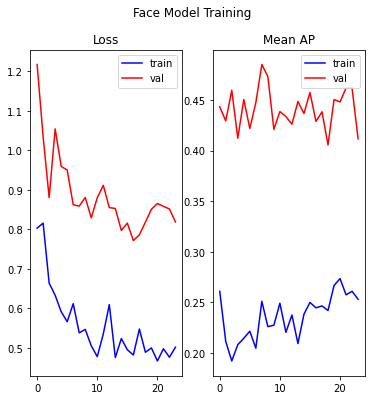

In [51]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 6))
f.suptitle('Face Model Training')
ax1.plot(range(0,len(train_loss)), train_loss, color='Blue')
ax1.plot(range(0,len(val_loss)), val_loss, color='Red')
ax2.plot(range(0,len(train_map)), train_map, color='Blue')
ax2.plot(range(0,len(val_map)), val_map, color='Red')
ax1.legend(['train','val'])
ax2.legend(['train','val'])
ax1.title.set_text('Loss')
ax2.title.set_text('Mean AP')

Continus Train

In [52]:
epoch_start = 24
last_epoch = 32
train_loss = [0] * (last_epoch)
val_loss = [0] * (last_epoch)
train_map = [0] * (last_epoch)
val_map = [0] * (last_epoch)
# maxacc = -1
step_val = None
step_save = 1
batch_sz = 32

In [53]:
for ep in range(epoch_start, last_epoch):
  maxacc = train_step(Model=MergerModel, dataset_t=ALL_trainDB,
                      dataset_v=ALL_valDB, bsz=batch_sz,
                      Loss=all_loss, optimizer=all_opt,
                      collate=collate, epoch=ep,
                      tsampler=trainSampler, vsampler=valSampler,
                      last_epoch=last_epoch, modal='all',
                      device=device, debug_mode=True,
                      tqdm=tqdm, train_loss=train_loss,
                      train_map=train_map, val_loss=val_loss,
                      val_map=val_map, maxacc=maxacc,
                      step2val=step_val, step2save=step_save,
                      checkpointdir='Checkpoints', model_name='all_mergenew')
  print('/////////////////////////////////////////////////////////////////')

  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13338749 0.16574168 0.22600117 0.25110045 0.3335749  0.26256165
 0.2879275  0.6013237 ] |8| mAP: 0.28270232677459717


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.13893119 0.35035393 0.2695109  0.2905617  0.48356274 0.69236135
 0.2527295  0.89427435] |8| mAP: 0.4215357005596161
- Mean training loss: 0.5390 ; epoch 25
- Mean validation loss: 0.8358 ; epoch 25
- Mean training mAP: 0.2827 ; epoch 25
- Mean validation mAP: 0.4215 ; epoch 25
Model Checkpoints/all_mergenew_best.pth saved
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.19940725 0.18509522 0.09484651 0.21154964 0.25770596 0.23579536
 0.22332281 0.5545466 ] |8| mAP: 0.24528366327285767


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.25640017 0.32960632 0.2822096  0.27577788 0.5509133  0.68459
 0.2835293  0.9181559 ] |8| mAP: 0.4476478099822998
- Mean training loss: 0.4854 ; epoch 26
- Mean validation loss: 0.8127 ; epoch 26
- Mean training mAP: 0.2453 ; epoch 26
- Mean validation mAP: 0.4476 ; epoch 26
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.07148715 0.14131898 0.15277335 0.15793124 0.31972495 0.24737698
 0.43835497 0.46955833] |8| mAP: 0.24981574714183807


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21699238 0.45037118 0.20159864 0.31858835 0.42460185 0.5979643
 0.25822717 0.9061472 ] |8| mAP: 0.42181137204170227
- Mean training loss: 0.4708 ; epoch 27
- Mean validation loss: 0.8415 ; epoch 27
- Mean training mAP: 0.2498 ; epoch 27
- Mean validation mAP: 0.4218 ; epoch 27
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.14701834 0.2791201  0.10018236 0.16027313 0.36904487 0.1612868
 0.37668934 0.5492819 ] |8| mAP: 0.26786208152770996


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.20471978 0.34422168 0.2597886  0.36716798 0.4711057  0.6549112
 0.27382046 0.89580786] |8| mAP: 0.43394291400909424
- Mean training loss: 0.4502 ; epoch 28
- Mean validation loss: 0.8155 ; epoch 28
- Mean training mAP: 0.2679 ; epoch 28
- Mean validation mAP: 0.4339 ; epoch 28
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.13662928 0.17863375 0.20061582 0.14377667 0.29264867 0.23510174
 0.19231331 0.5458133 ] |8| mAP: 0.24069157242774963


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.18185917 0.50935674 0.25037464 0.34579888 0.43038157 0.6756543
 0.3466098  0.92325395] |8| mAP: 0.4579111337661743
- Mean training loss: 0.4975 ; epoch 29
- Mean validation loss: 0.8121 ; epoch 29
- Mean training mAP: 0.2407 ; epoch 29
- Mean validation mAP: 0.4579 ; epoch 29
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.1894024  0.21817538 0.20345835 0.08590277 0.3908377  0.2121598
 0.45256218 0.54672146] |8| mAP: 0.28740251064300537


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21505782 0.36103362 0.21056664 0.29843083 0.5527071  0.6193167
 0.31240124 0.9261388 ] |8| mAP: 0.43695658445358276
- Mean training loss: 0.4920 ; epoch 30
- Mean validation loss: 0.8197 ; epoch 30
- Mean training mAP: 0.2874 ; epoch 30
- Mean validation mAP: 0.4370 ; epoch 30
Model Checkpoints/all_mergenew_best.pth saved
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.26805472 0.22182792 0.10332505 0.24912801 0.37513378 0.1527944
 0.2756166  0.63988644] |8| mAP: 0.2857208549976349


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.21213259 0.4192197  0.41499287 0.30236778 0.48457533 0.59730816
 0.2795437  0.9045986 ] |8| mAP: 0.451842337846756
- Mean training loss: 0.4792 ; epoch 31
- Mean validation loss: 0.8844 ; epoch 31
- Mean training mAP: 0.2857 ; epoch 31
- Mean validation mAP: 0.4518 ; epoch 31
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


  0%|          | 0/7 [00:00<?, ?batch/s]

AveragePrecision: [0.09574586 0.21946779 0.08633865 0.13372533 0.430836   0.2074482
 0.2652691  0.6509034 ] |8| mAP: 0.26121678948402405


  0%|          | 0/6 [00:00<?, ?batch/s]

AveragePrecision: [0.18845835 0.38933694 0.28365374 0.27584556 0.5998331  0.64724696
 0.28287634 0.9094486 ] |8| mAP: 0.44708743691444397
- Mean training loss: 0.4502 ; epoch 32
- Mean validation loss: 0.8460 ; epoch 32
- Mean training mAP: 0.2612 ; epoch 32
- Mean validation mAP: 0.4471 ; epoch 32
Model Checkpoints/all_mergenew_last.pth saved
/////////////////////////////////////////////////////////////////


Test with the model of epoch 32

In [54]:
# ENTIRE MODEL around 
allMAP = eval(MergerModel, ALL_testDB, 32, None, collate=collate, modal='all',
               device=device, debug_mode=True, tqdm=tqdm)

  0%|          | 0/16 [00:00<?, ?batch/s]

AveragePrecision: [0.714465   0.587335   0.19661003 0.23879755 0.08957858 0.30468214
 0.07793484 0.8205979 ] |8| mAP: 0.37875014543533325


# Saving models in drive

In [56]:
destiny_path = "/content/drive/MyDrive/checkpoints/"

In [57]:
import os
all_checkpoints = os.listdir('/content/Checkpoints')

for cp in all_checkpoints:
  f ='/content/Checkpoints/'+ cp 
  !cp $f $destiny_path

In [58]:
# rm -r Checkpoints/